In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

hr_df = pd.read_csv("./hr-data.csv")

hr_df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [2]:
hr_df.head()

#15 thousand workers

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [4]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

#Seperate data into different data types... 

num_var = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'time_spend_company']

ord_var = ['salary']

cat_var = ['sales']

bin_var =  ['Work_accident','promotion_last_5years','churn' ]

target = hr_df['churn']


poly = PolynomialFeatures(3, interaction_only=True, include_bias=False)
x_tmp = poly.fit_transform(hr_df[num_var])
poly.powers_


# Build a column transformer
numeric_transformer =  Pipeline(steps=[
    ('feature_creat', PolynomialFeatures(3, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())])  

ordinal_transformer = OrdinalEncoder(categories  = [ ['low','medium','high'] ] ) 

#cat_transformer = OneHotEncoder(categories  = [ ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']])

    
# Create the preprocessor
preprocessor = ColumnTransformer(transformers = [ ('numerical', numeric_transformer, num_var),
                                                  ('ordinal',ordinal_transformer, ord_var),
                                                  #('categorical',cat_transformer, cat_var),
                                                  ('binary','passthrough', bin_var)],
                                                   remainder = 'drop')

# Set our X and y variables for use in our model
X = hr_df
y = hr_df['churn'] 


#Seperate our train and test splits
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 42)

X_train_transformed = preprocessor.fit_transform(X)
X_val_transformed = preprocessor.fit_transform(X_val)
y_val = y_val.astype(bool)

create_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(num_var,p) for p in poly.powers_ ]]


In [5]:
cat_var_list =['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']

#num_var

transformed_columns = create_feature_names + ord_var  + bin_var # + date_var + cat_var_list

print(X_train_transformed.shape)
print(len(transformed_columns))

X_train_transform_df = pd.DataFrame(X_train_transformed, columns = transformed_columns)

X_train_transform_df.head()

(14999, 29)
29


,satisfaction_level^1,last_evaluation^1,average_montly_hours^1,number_project^1,time_spend_company^1,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xaverage_montly_hours^1,...,satisfaction_level^1xaverage_montly_hours^1xtime_spend_company^1,satisfaction_level^1xnumber_project^1xtime_spend_company^1,last_evaluation^1xaverage_montly_hours^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1xtime_spend_company^1,last_evaluation^1xnumber_project^1xtime_spend_company^1,average_montly_hours^1xnumber_project^1xtime_spend_company^1,salary,Work_accident,promotion_last_5years,churn
0,-0.936495,-1.087275,-0.882040,-1.462863,-0.341235,-1.074873,-1.033361,-1.289520,-0.734475,-1.105271,...,-0.806966,-0.967354,-1.171788,-0.822259,-0.990721,-0.938100,0.0,0.0,0.0,1.0
1,0.752814,0.840707,1.220423,0.971113,1.713436,1.087133,1.414326,1.446903,2.044811,1.361798,...,2.699714,2.698499,1.474964,2.434645,2.214143,2.417541,1.0,0.0,0.0,1.0
2,-2.022479,0.957554,1.420657,2.593763,0.343655,-1.539619,-1.518851,-1.281074,-1.266033,1.605536,...,-0.999755,-0.832332,2.988072,1.269086,2.049791,2.299187,1.0,0.0,0.0,1.0
3,0.431041,0.899131,0.439508,0.971113,1.028546,0.813439,0.613775,1.109073,1.133570,0.818248,...,1.221123,1.685832,1.043432,1.306345,1.640328,1.309180,0.0,0.0,0.0,1.0
4,-0.976716,-1.145699,-0.841993,-1.462863,-0.341235,-1.114860,-1.046911,-1.306411,-0.757256,-1.114472,...,-0.815061,-0.977481,-1.174710,-0.826957,-0.999222,-0.932279,0.0,0.0,0.0,1.0


3571
[11428]


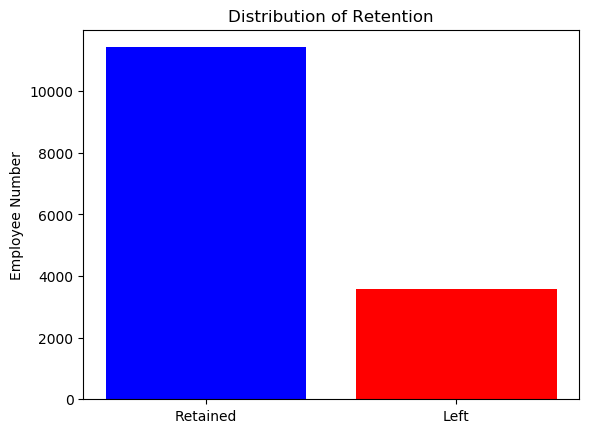

In [6]:
# Plot the churns

plt.style.use('default')

num_churn = y.sum()
num_retain = y.shape - y.sum()

print(num_churn)
print(num_retain)

objects = ('Retained', 'Left')
y_pos = np.arange(len(objects))
performance = [num_retain,num_churn]

plt.bar(y_pos, performance, align='center', alpha=1.0, color=['b','r'])
plt.xticks(y_pos, objects)
plt.ylabel('Employee Number')
plt.title('Distribution of Retention')

plt.show()


In [7]:
# Distribution of Leavers by Salary Type

salary_low  = 30
salary_medium = 60
salary_high = 90

leavers = hr_df[ hr_df['churn'] == 1 ] 
amounts = leavers['salary'].value_counts()

#print(amounts)

# Find hours and money that leave

Total_Hours = leavers['average_montly_hours'].sum()

Total_Years = leavers['time_spend_company'].sum()

Total_Projects = leavers['number_project'].sum()

Total_Money = amounts[0]*salary_low + amounts[1]*salary_medium + amounts[2]*salary_high

print('Total Hours Lost:', Total_Hours)
print('Total Salary Lost:',Total_Money)
print('Total Experience Lost:',Total_Years)
print('Total Projects Lost:',Total_Projects)


Total Hours Lost: 740694
Total Salary Lost: 151560
Total Experience Lost: 13843
Total Projects Lost: 13768


In [8]:
# Check for differences in the groups....

Churn_false = X_train_transform_df[X_train_transform_df['churn']==0]
#Churn_false.describe()

Churn_true = X_train_transform_df[X_train_transform_df['churn']==1]
#Churn_true.describe()

Churn_test = (Churn_false.describe().T - Churn_true.describe().T)

Churn_test['mean'] = np.abs(Churn_test['mean'])

print(Churn_test.sort_values(by='mean',ascending=False))

X_train_transform_df.drop(columns='churn',inplace=True)


                                                     count      mean  \
churn                                               7857.0  1.000000   
satisfaction_level^1                                7857.0  0.911871   
satisfaction_level^1xnumber_project^1               7857.0  0.774813   
satisfaction_level^1xaverage_montly_hours^1         7857.0  0.707793   
satisfaction_level^1xlast_evaluation^1              7857.0  0.686783   
average_montly_hours^1xnumber_project^1xtime_sp...  7857.0  0.605533   
last_evaluation^1xaverage_montly_hours^1xtime_s...  7857.0  0.568492   
last_evaluation^1xnumber_project^1xtime_spend_c...  7857.0  0.550079   
last_evaluation^1xaverage_montly_hours^1xnumber...  7857.0  0.537819   
satisfaction_level^1xaverage_montly_hours^1xnum...  7857.0  0.528225   
satisfaction_level^1xlast_evaluation^1xnumber_p...  7857.0  0.509798   
satisfaction_level^1xlast_evaluation^1xaverage_...  7857.0  0.475129   
average_montly_hours^1xtime_spend_company^1         7857.0  0.46

## Clustering...
 - K-Means
 - DBSCAN
 - Hierarchical Clustering
 - Gaussian Mixture






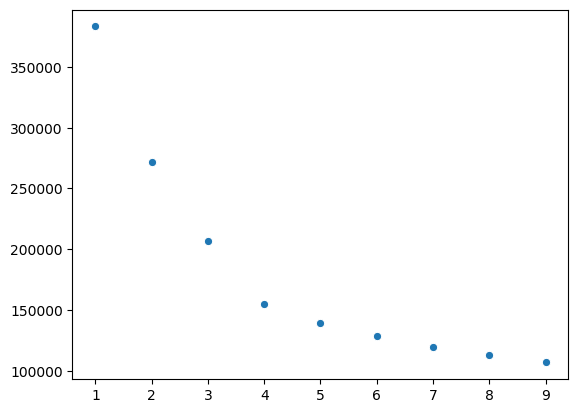

In [9]:
from sklearn.cluster import KMeans

inertia_list =[]

for Nclus in range(1,10):

    kmeans_model = KMeans(random_state=42, init='random', n_clusters = Nclus).fit(X_train_transform_df)
    
    inertia_list.append(kmeans_model.inertia_)
    
sns.scatterplot(range(1,10),inertia_list)

In [10]:
kmeans_model = KMeans(random_state=42, init='random', n_clusters = 4).fit(X_train_transform_df)
from sklearn.metrics import silhouette_score
X_train_transform_df['pca_all_labels'] = kmeans_model.labels_

X_train_transform_df.groupby('pca_all_labels').describe()

X_train_transform_df.drop(columns='pca_all_labels',inplace=True)

silhouette_score(X_train_transform_df,kmeans_model.labels_, metric = 'euclidean')

from sklearn.cluster import AgglomerativeClustering

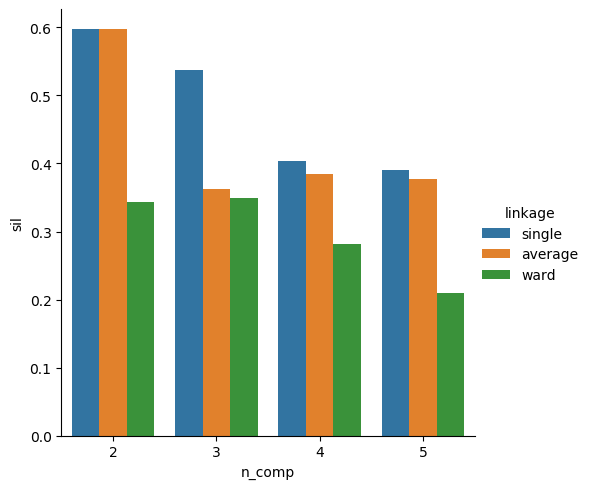

In [11]:
import itertools

model_iterator = itertools.product({'ward', 'average', 'single'}, range(2,6))

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#X_all_cust_grp_scale = pd.DataFrame(scaler.fit_transform(X_all_cust_grp),
#                                    columns=X_all_cust_grp.columns)

agg_model_list = [ AgglomerativeClustering(affinity = 'euclidean', linkage = linkage, 
                  n_clusters = number).fit(X_train_transform_df) for linkage,number in model_iterator]

agg_model_sil_list = [silhouette_score(X_train_transform_df,model.labels_, metric = 'euclidean') for model in agg_model_list]

model_iterator = itertools.product({'ward', 'average', 'single'}, range(2,6))

agg_model_all_df = pd.DataFrame(model_iterator, columns =['linkage','n_comp'])

agg_model_all_df['sil'] = agg_model_sil_list 

sns.catplot(x='n_comp',y='sil', hue= 'linkage',data=agg_model_all_df,kind='bar')

In [12]:
X_train_transform_df['churn'] = y

best_agg_model = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', 
                  n_clusters = 3).fit(X_train_transform_df) 

X_zero = X_train_transform_df.iloc[best_agg_model.labels_==0]

X_one = X_train_transform_df.iloc[best_agg_model.labels_==1]

X_two = X_train_transform_df.iloc[best_agg_model.labels_==2]
#print(X_zero.describe().T)
#print(X_one.describe().T)

print(X_zero.shape[0])
print(X_one.shape[0])
print(X_two.shape[0])

A = (X_zero.describe().T - X_one.describe().T)

print(A.sort_values(by ='mean', ascending=False))

11390
1361
2248
                                                      count      mean  \
Work_accident                                       10029.0  0.044165   
salary                                              10029.0  0.031896   
promotion_last_5years                               10029.0 -0.002649   
churn                                               10029.0 -0.484432   
satisfaction_level^1                                10029.0 -0.517257   
number_project^1                                    10029.0 -0.785006   
average_montly_hours^1                              10029.0 -0.897921   
satisfaction_level^1xaverage_montly_hours^1         10029.0 -0.954290   
average_montly_hours^1xnumber_project^1             10029.0 -0.973339   
satisfaction_level^1xnumber_project^1               10029.0 -0.973625   
satisfaction_level^1xlast_evaluation^1              10029.0 -0.977538   
last_evaluation^1                                   10029.0 -1.032025   
last_evaluation^1xnumber_project^1 

In [13]:
print(X_zero['churn'].sum()/X_zero.shape[0])  # Low Risk

print(X_one['churn'].sum()/X_one.shape[0])    # High Risk

print(X_two['churn'].sum()/X_two.shape[0])    # Medium Risk

0.15039508340649693
0.6348273328434975
0.44217081850533807


In [14]:
B = (X_two.describe().T - X_one.describe().T)

print(B.sort_values(by ='mean', ascending=False))


# Save csv's....

X_train_transform_df.to_csv('data_all_risk.csv',index=False)
X_zero.to_csv('data_low_risk.csv',index=False)
X_one.to_csv('data_high_risk.csv',index=False)
X_two.to_csv('data_medium_risk.csv',index=False)

                                                    count      mean       std  \
number_project^1                                    887.0  0.652099  0.373955   
average_montly_hours^1xnumber_project^1             887.0  0.518098  0.614067   
last_evaluation^1xaverage_montly_hours^1xnumber...  887.0  0.227877  0.617879   
last_evaluation^1xnumber_project^1                  887.0  0.201684  0.410560   
Work_accident                                       887.0  0.010628  0.012805   
promotion_last_5years                               887.0 -0.006453 -0.021641   
salary                                              887.0 -0.017503 -0.009061   
average_montly_hours^1                              887.0 -0.040917  0.442076   
churn                                               887.0 -0.192657  0.015099   
last_evaluation^1xaverage_montly_hours^1            887.0 -0.367934  0.334564   
average_montly_hours^1xnumber_project^1xtime_sp...  887.0 -0.404044  0.380693   
number_project^1xtime_spend_

# Compare Risk Groups, what are thier differences...

In [15]:

hr_df.mean()
hr_df.std()

orig_mean = hr_df.mean()
orig_std = hr_df.std()

hr_df['salary'].value_counts()

salary_mean = (6446*1 + 1237*2)/14999
salary_std = np.sqrt((7316*(0-salary_mean)**2 + 6446*((0-salary_mean)**2) + 1237*(0-salary_mean)**2)/(14999))

print(salary_mean,salary_std)

orig_mean = orig_mean.append(pd.Series(salary_mean,index=['salary']))
orig_std = orig_std.append(pd.Series(salary_std,index=['salary']))

orig_mean = orig_mean.drop(index='id')
orig_std = orig_std.drop(index='id')

orig_mean.to_csv('orig_mean.csv')
orig_std.to_csv('orig_std.csv')

0.5947063137542503 0.5947063137542503


In [16]:
Group_Compare = X_train_transform_df.copy().describe().loc['mean']

Group_Compare = Group_Compare.drop(index = ['satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xaverage_montly_hours^1',
       'satisfaction_level^1xnumber_project^1',
       'satisfaction_level^1xtime_spend_company^1',
       'last_evaluation^1xaverage_montly_hours^1',
       'last_evaluation^1xnumber_project^1',
       'last_evaluation^1xtime_spend_company^1',
       'average_montly_hours^1xnumber_project^1',
       'average_montly_hours^1xtime_spend_company^1',
       'number_project^1xtime_spend_company^1',
       'satisfaction_level^1xlast_evaluation^1xaverage_montly_hours^1',
       'satisfaction_level^1xlast_evaluation^1xnumber_project^1',
       'satisfaction_level^1xlast_evaluation^1xtime_spend_company^1',
       'satisfaction_level^1xaverage_montly_hours^1xnumber_project^1',
       'satisfaction_level^1xaverage_montly_hours^1xtime_spend_company^1',
       'satisfaction_level^1xnumber_project^1xtime_spend_company^1',
       'last_evaluation^1xaverage_montly_hours^1xnumber_project^1',
       'last_evaluation^1xaverage_montly_hours^1xtime_spend_company^1',
       'last_evaluation^1xnumber_project^1xtime_spend_company^1',
       'average_montly_hours^1xnumber_project^1xtime_spend_company^1'])

#Group_Compare.index = hr_df.mean().index[1:-1]

Group_Compare = Group_Compare.rename(index= {'satisfaction_level^1': 'satisfaction_level',
                           'last_evaluation^1' : 'last_evaluation',
                           'average_montly_hours^1' : 'average_montly_hours',
                           'number_project^1' : 'number_project',
                           'time_spend_company^1' : 'time_spend_company'})

Low_risk = (Group_Compare * orig_std) + orig_mean

print(Low_risk)

Work_accident              0.195472
average_montly_hours     201.050337
churn                      0.339488
last_evaluation            0.716102
number_project             3.803054
promotion_last_5years      0.024337
salary                     0.948382
satisfaction_level         0.612834
time_spend_company         3.498233
dtype: float64


In [17]:
X_two.copy().describe()

,satisfaction_level^1,last_evaluation^1,average_montly_hours^1,number_project^1,time_spend_company^1,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xaverage_montly_hours^1,...,satisfaction_level^1xaverage_montly_hours^1xtime_spend_company^1,satisfaction_level^1xnumber_project^1xtime_spend_company^1,last_evaluation^1xaverage_montly_hours^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1xtime_spend_company^1,last_evaluation^1xnumber_project^1xtime_spend_company^1,average_montly_hours^1xnumber_project^1xtime_spend_company^1,salary,Work_accident,promotion_last_5years,churn
count,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,...,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,-1.653471,0.317441,0.647082,1.150485,0.614199,-1.308798,-1.284283,-1.106174,-0.897533,0.628235,...,-0.727965,-0.609753,1.100338,0.803276,1.064840,1.209267,0.555605,0.120107,0.017794,0.442171
std,0.503339,0.937393,1.084785,1.010421,0.861738,0.408594,0.443647,0.457560,0.589838,1.103561,...,0.554641,0.549407,1.341120,0.941564,0.985045,1.088308,0.620467,0.325159,0.132230,0.496755
min,-2.102922,-2.080478,-2.103471,-1.462863,-1.026126,-1.761774,-1.778736,-1.762482,-1.417906,-1.879539,...,-1.282729,-1.230647,-1.311240,-1.315069,-1.152239,-1.018620,0.000000,0.000000,0.000000,0.000000
25%,-2.022479,-0.386191,-0.181219,0.159788,0.343655,-1.578718,-1.554764,-1.424652,-1.266033,-0.297584,...,-1.029795,-0.947101,-0.085548,0.095048,0.343931,0.272972,0.000000,0.000000,0.000000,0.000000
50%,-1.821371,0.548588,0.960118,1.782438,0.343655,-1.496966,-1.468571,-1.297966,-1.121753,0.820678,...,-0.952550,-0.835707,0.925591,1.002220,1.211029,1.406677,0.000000,0.000000,0.000000,0.000000
75%,-1.459376,1.074402,1.520775,1.782438,1.028546,-1.180618,-1.178649,-0.949579,-0.764850,1.561094,...,-0.683360,-0.491401,2.313138,1.427929,1.721087,1.992629,1.000000,0.000000,0.000000,1.000000
max,0.310376,1.658639,2.181549,2.593763,4.452998,0.658375,0.943856,1.311771,1.968875,2.670415,...,1.956907,3.407365,4.171665,4.445535,5.019462,6.492041,2.000000,1.000000,1.000000,1.000000
